# Thinkful Capstone 2: Supervised Learning
## Google Analytics Customer Propensity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ds_useful as ds

[My Useful Data Science Functions](https://github.com/cobyoram/python-for-data-scientists/blob/master/ds_useful.py)

In [2]:
data = pd.read_csv('https://query.data.world/s/ela5zqyl3qv3ww6iner6zly67xfvc6', sep=';')

In [3]:
bank = data.copy()
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [5]:
bank.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [6]:
bank.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [7]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
bank.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [9]:
ds.missingness_summary(bank)

y                 0.0
day_of_week       0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
duration          0.0
nr.employed       0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
age               0.0
dtype: float64

In [10]:
ds.outliers_summary(bank)

previous          13.656890
duration           7.193843
campaign           5.841507
pdays              3.678256
age                1.138681
cons.conf.idx      1.085268
nr.employed        0.000000
euribor3m          0.000000
cons.price.idx     0.000000
emp.var.rate       0.000000
dtype: float64

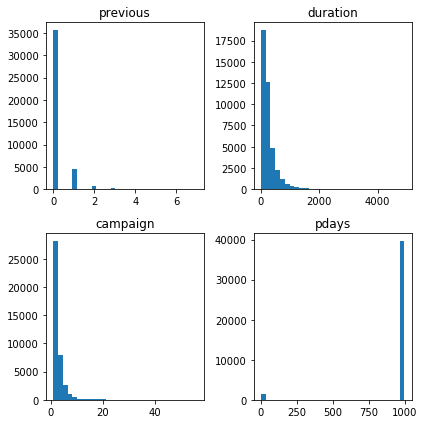

In [11]:
def plot(df, col):
    plt.hist(df[col], bins=30)
ds.make_subplots(bank[['previous','duration','campaign','pdays']], plot)

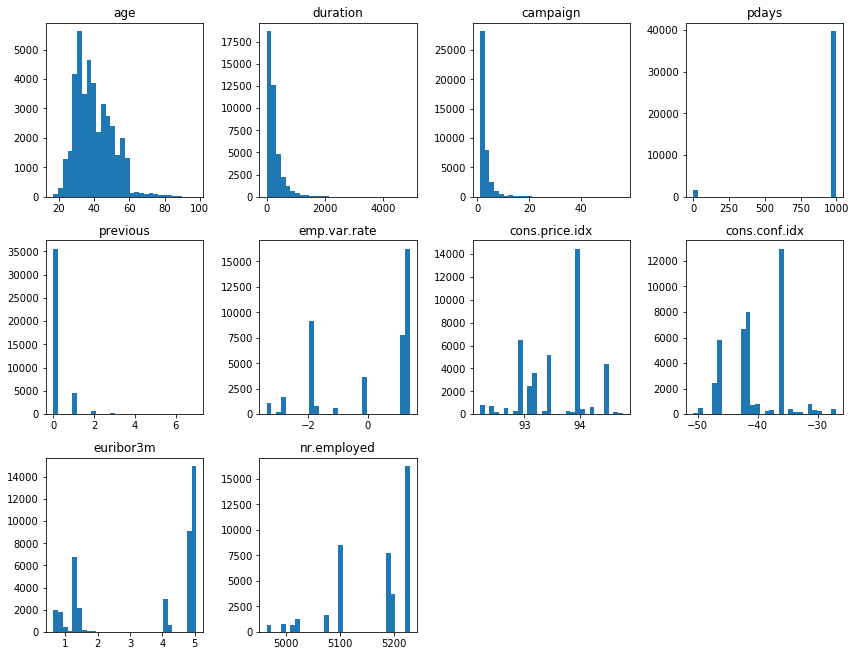

In [12]:
ds.make_subplots(bank.select_dtypes('number'), plot)

In [13]:
def get_categorical_columns(df, unique_thresh=10, non_binary=False):
    columns = []
    for col in df.columns:
        if df[col].nunique() < unique_thresh:
            if non_binary and df[col].nunique() < 2:
                continue
            columns.append(col)
    return columns

cat_cols = get_categorical_columns(data, non_binary=True)

In [14]:
from scipy.stats.mstats import winsorize

outliers = ds.outliers_summary(bank.select_dtypes('number'))
print(outliers)
for col in outliers.loc[outliers > 0].index:
    percentiles = ds.get_percentiles(bank, col)
    bank[col] = winsorize(bank[col], percentiles)

previous          13.656890
duration           7.193843
campaign           5.841507
pdays              3.678256
age                1.138681
cons.conf.idx      1.085268
nr.employed        0.000000
euribor3m          0.000000
cons.price.idx     0.000000
emp.var.rate       0.000000
dtype: float64


IndexError: index 41188 is out of bounds for axis 0 with size 41188

In [15]:
dummies = pd.get_dummies(data, columns=cat_cols, drop_first=True)
dummies = pd.get_dummies(dummies, columns=dummies.select_dtypes('object').columns, drop_first=True)
dummies.head()

,age,duration,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,marital_married,...,job_unknown,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,56,261,1,999,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,0,0,0,1,0,0,0
1,57,149,1,999,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,0,0,0,1,0,0,0
2,37,226,1,999,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,0,0,0,1,0,0,0
3,40,151,1,999,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,0,0,0,1,0,0,0
4,56,307,1,999,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,0,0,0,1,0,0,0


In [19]:
from sklearn.model_selection import train_test_split

X = dummies.drop('y_yes', axis=1)
Y = dummies['y_yes']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.1)

In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

print('Training Score:', rfc.score(X_train, Y_train))
print('Testing Score: ', rfc.score(X_test, Y_test))

Training Score: 1.0
Testing Score:  0.9121145909201263


In [21]:
rfc = RandomForestClassifier(n_estimators=200, max_features=29, max_depth=8)
rfc.fit(X_train, Y_train)

print('Training Score:', rfc.score(X_train, Y_train))
print('Testing Score: ', rfc.score(X_test, Y_test))

Training Score: 0.9314791335077828
Testing Score:  0.9150279193979121


In [22]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(rfc,
    param_grid={
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [4, 8, 10, 12],
        'max_features': [int(len(X_train.columns)/x) for x in [1,2,3,4,5]]
    })

gs.fit(X_train, Y_train)
print(gs.best_score_)
print(gs.best_params_)